# Measuring positions of the vehicle
The code snippets below take CSV files from positional video recordings of the remote control car. In this notebook we will analyze the vehicles positions on different tracks.

In [191]:
import numpy as np
import csv, math
import matplotlib.pyplot as plt
%matplotlib inline
import os

def read_x_y(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    positions = []
    for row in reader:
        positions.append( [round(float(row[1]),1), round(-float(row[2]),1) + 300, False] )
    return positions

def dist(a,b):
    x1,y1,AUX = a[0],a[1],a[2]
    x2,y2,AUX = b[0],b[1],b[2]
    return math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2))

def getAveragePositions(positions):
    averagex = []
    averagey = []
    print("=== "+str(len(positions)))
    nearestx = []
    nearesty = []
    for i in range (len(positions)):
        point1 = positions[i]
        positions[i][2] = True
        #print('- p1 :   ' + str(point1))
        for j in range(i+1,len(positions)):
            if (positions[j][2] == False):
                point2 = positions[j]
                #print('-- p2 :   ' + str(point2))
                if(dist(point1,point2) < 50):            
                    # Append it to the nearest list
                    nearestx.append(point2[0])
                    nearesty.append(point2[1])
                    #print('----- APPEND')
                    if(j < len(positions)-1):
                        positions[j][2] = True
            if(len(nearestx) > 90):
                averagex.append(np.mean(nearestx))
                averagey.append(np.mean(nearesty))
                #print('nearestx ---- '+str(len(nearestx)))
                nearestx = []
                nearesty = []
    print(len(averagex))
    return averagex, averagey

Calculate average x, y positions of the tracks=
* does the mean of the robot path, is it or not different thatn the human path
* Student tea test, demonstrate normality - is it normal
* null hypothesis, assume that the mean robot error

In [203]:
import os

cwd = os.getcwd()
directory = cwd+'/csvs/circuitcsv/'
rnn,rnncat, linear, cat, human = [],[],[],[],[]

for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        fdir = os.path.join(directory, filename)
        if 'rnncat' in  filename:
            rnncat.append(read_x_y(str(fdir)))
            pass
        if 'cat' in filename:
            cat.append(read_x_y(str(fdir)))
            pass
        if 'linear' in filename:
            linear.append(read_x_y(str(fdir)))
            pass
        if 'rnn' in filename:
            rnn.append(read_x_y(str(fdir)))
            pass
        if 'human' in filename:
            human.append(read_x_y(str(fdir)))
            pass
        pass
    else:
        continue
pass

### Categorical - Average Positions

In [204]:
pos = cat
if(len(pos) != 0):
    print("== "+data)
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    catx,caty = getAveragePositions(totalpos)

== human
=== 14113
160


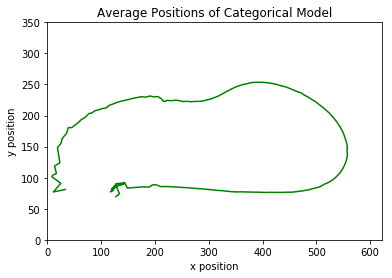

In [213]:
n=8
#plt.plot(catx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.plot(catx[:len(catx)-n],caty[:len(caty)-n], c='green')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Positions of Categorical Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Linear - Average Positions

In [193]:
pos = linear
if(len(pos) != 0):
    print("== "+data)
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    linearx,lineary = getAveragePositions(totalpos)

== human
=== 3594
41


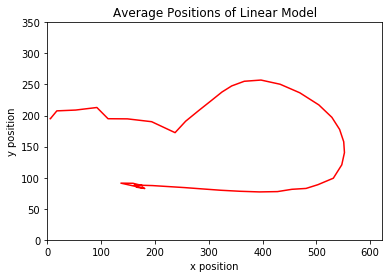

In [194]:
n=0
plt.plot(linearx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Positions of Linear Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Human - Average Positions

In [195]:
pos = human
if(len(pos) != 0):
    print("== "+data)
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    hx,hy = getAveragePositions(totalpos)

== human
=== 5572
67


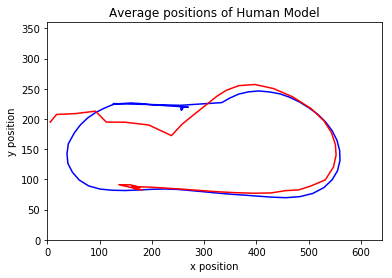

In [198]:
plt.plot(hx,hy,c='b')
#plt.plot(linearx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.plot(linearx,lineary,c='red')
plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average positions of Human Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

In [184]:
len(hx)

55